# Heart Failure Prediction Assignment

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [23]:
df=pd.read_csv("heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [24]:
df.shape

(299, 13)

In [25]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## Objective
The goal of this assignment is to analyze the **heart failure clinical records** dataset and build a machine learning model to predict the occurrence of a **death event** in patients with heart failure. You will perform exploratory data analysis (EDA), visualize trends, and apply classification models to predict the target variable.

## Dataset Overview

The dataset consists of 13 variables, each representing clinical features and demographic information of heart failure patients:

1. **age**: Age of the patient (years)
2. **anaemia**: Whether the patient has anaemia (0: no, 1: yes)
3. **creatinine_phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)
4. **diabetes**: Whether the patient has diabetes (0: no, 1: yes)
5. **ejection_fraction**: Percentage of blood leaving the heart with each contraction (%)
6. **high_blood_pressure**: Whether the patient has high blood pressure (0: no, 1: yes)
7. **platelets**: Platelets in the blood (kiloplatelets/mL)
8. **serum_creatinine**: Level of serum creatinine in the blood (mg/dL)
9. **serum_sodium**: Level of serum sodium in the blood (mEq/L)
10. **sex**: Gender of the patient (1: male, 0: female)
11. **smoking**: Whether the patient smokes (0: no, 1: yes)
12. **time**: Follow-up period (days)
13. **DEATH_EVENT**: Whether the patient died during the follow-up period (0: no, 1: yes) [Target Variable]

## Instructions

### 1. Data Exploration (EDA)
- **Task 1**: Load the dataset using pandas and display the first few rows.
- **Task 2**: Check for missing values and clean the data if necessary.
- **Task 3**: Generate summary statistics for the numerical columns.
- **Task 4**: Visualize the distribution of the target variable (`DEATH_EVENT`).
- **Task 5**: Plot histograms or box plots for continuous variables like `age`, `creatinine_phosphokinase`, `ejection_fraction`, `serum_creatinine`, etc.

### 2. Data Visualization
- **Task 6**: Create a correlation matrix heatmap to understand the relationships between the features.
- **Task 7**: Create count plots or bar charts for categorical variables like `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`.
- **Task 8**: Create scatter plots or pair plots for continuous variables like `age` vs `ejection_fraction`, `serum_creatinine`, etc., colored by `DEATH_EVENT`.

### 3. Model Building
- **Task 9**: Split the dataset into features (`X`) and the target variable (`y = DEATH_EVENT`).
- **Task 10**: Perform train-test splitting (70% training, 30% testing) using `train_test_split` from sklearn.
- **Task 11**: Standardize the continuous features using `StandardScaler`.

### 4. Model Training and Evaluation
- **Task 12**: Train a Logistic Regression model and evaluate it using accuracy, precision, recall, and F1-score.
- **Task 13**: Train a K-Nearest Neighbors (KNN) model and evaluate its performance.
- **Task 14**: Train a Decision Tree Classifier and compare its performance with other models.

### 5. Cross Validation
- **Task 15**: Perform K-Fold Cross-Validation (with 5 folds) on the Logistic Regression model to evaluate its performance.
- **Task 16**: Perform Stratified K-Fold Cross-Validation to ensure class balance during cross-validation.

### 6. Model Improvement
- **Task 17**: Use Grid Search or Randomized Search to tune the hyperparameters of the KNN and Decision Tree models.
- **Task 18**: Plot the ROC curves and calculate the AUC for all models to compare their performance visually.

### 7. Conclusion
- **Task 19**: Summarize your findings and explain which model performed best and why. Consider which features were most important for predicting the death event.
- **Task 20**: Suggest potential improvements or next steps for the analysis.

---

## Submission Instructions:
- Submit your notebook file to github with the completed analysis.
- Ensure that the notebook is well-documented with explanations for each step.
- Include visualizations and comments on the results of each model.
- Submit github link only


In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000

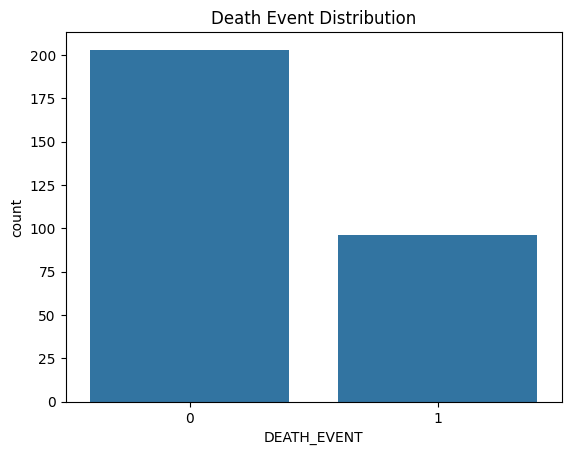

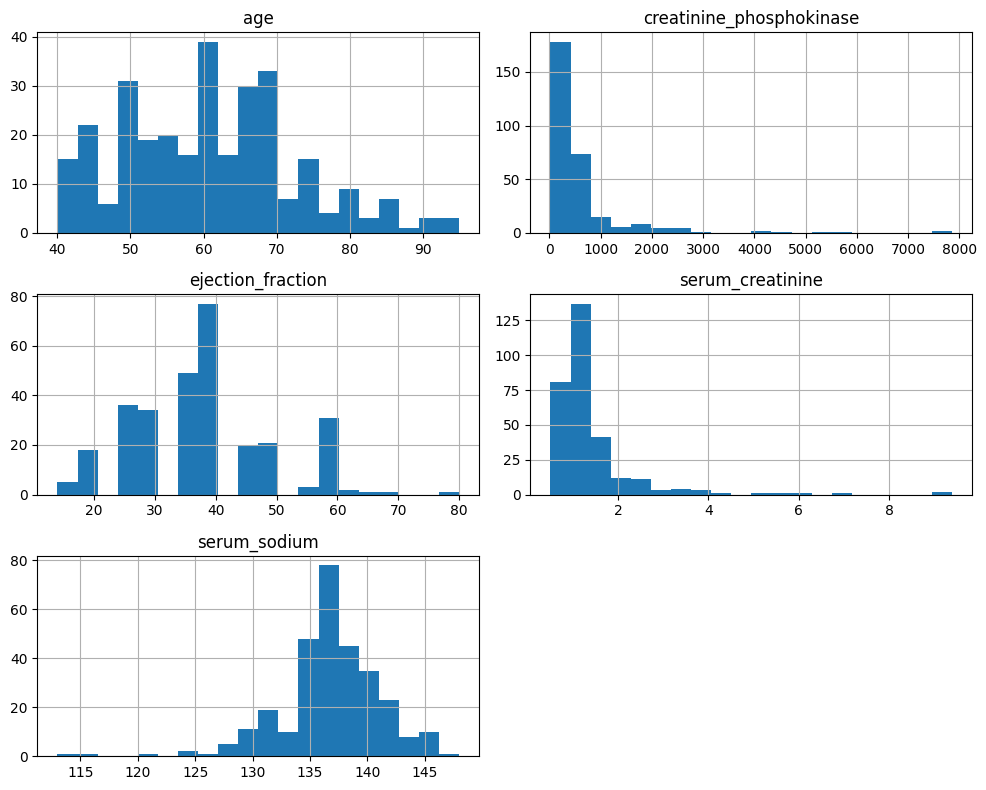

In [28]:
print(df.isnull().sum())
print(df.describe())
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Death Event Distribution')
plt.show()
continuous_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
df[continuous_vars].hist(bins=20, figsize=(10, 8), layout=(3, 2))
plt.tight_layout()
plt.show()

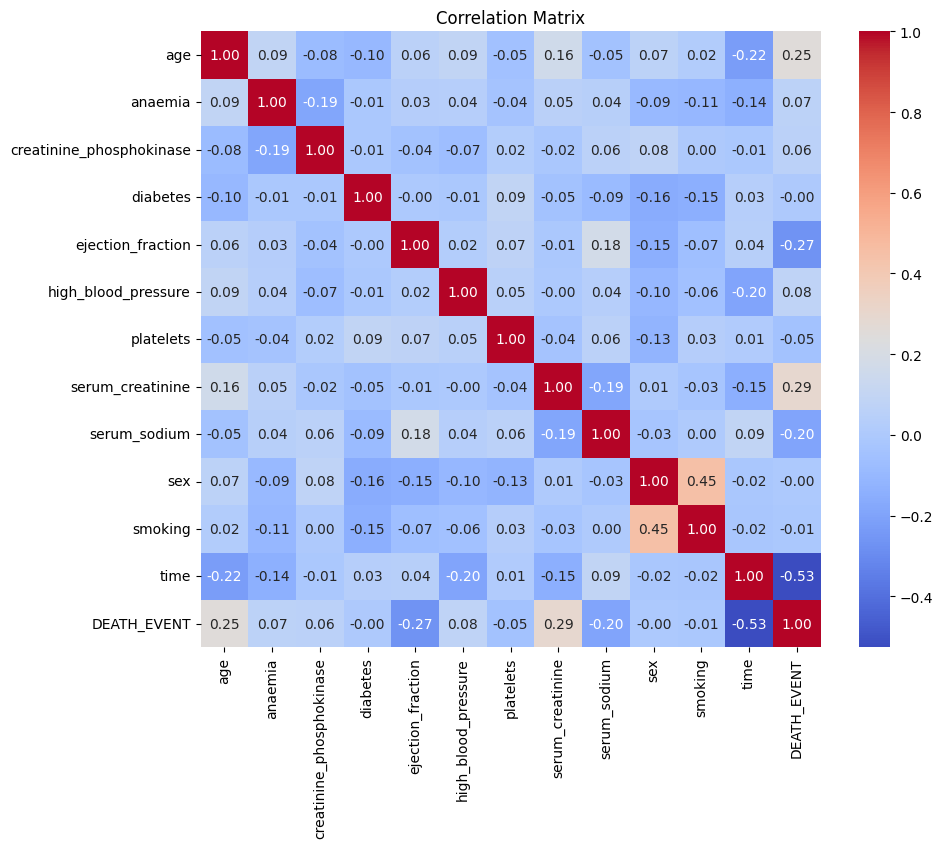

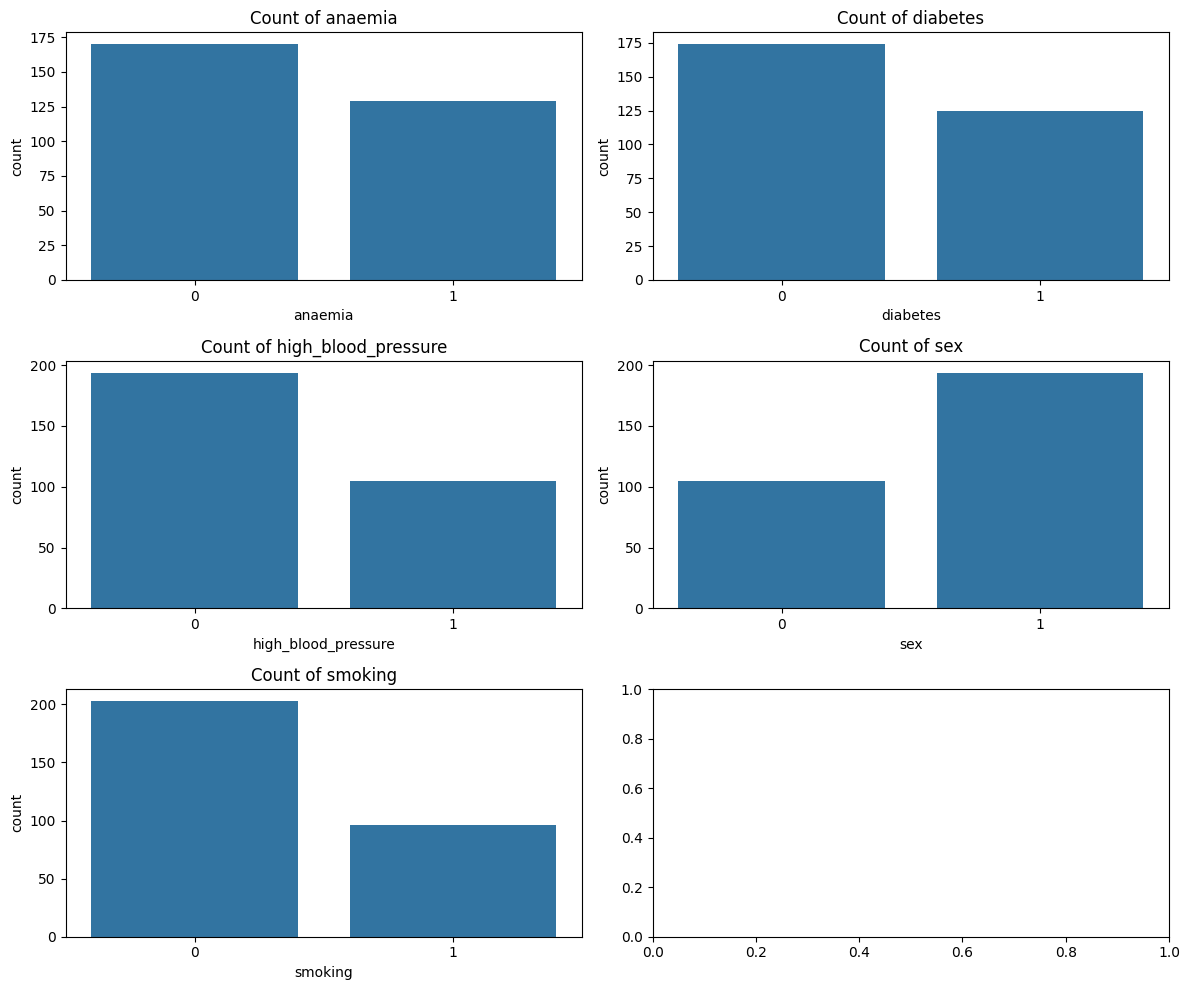

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Count of {var}')
plt.tight_layout()
plt.show()


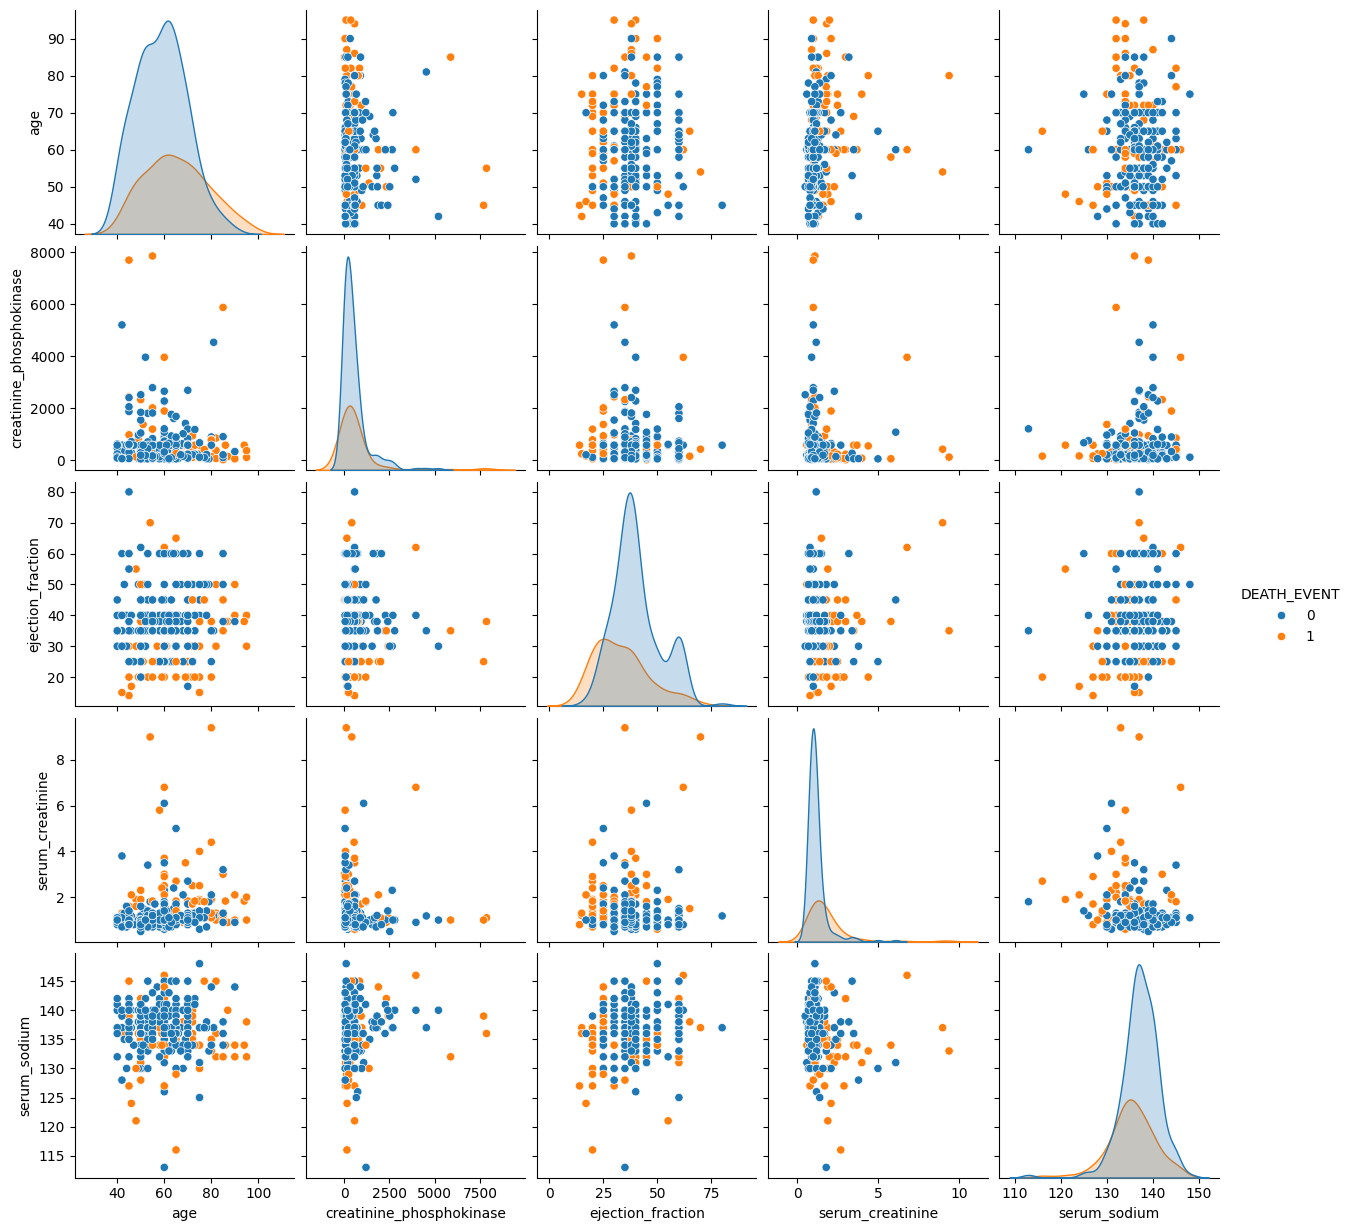

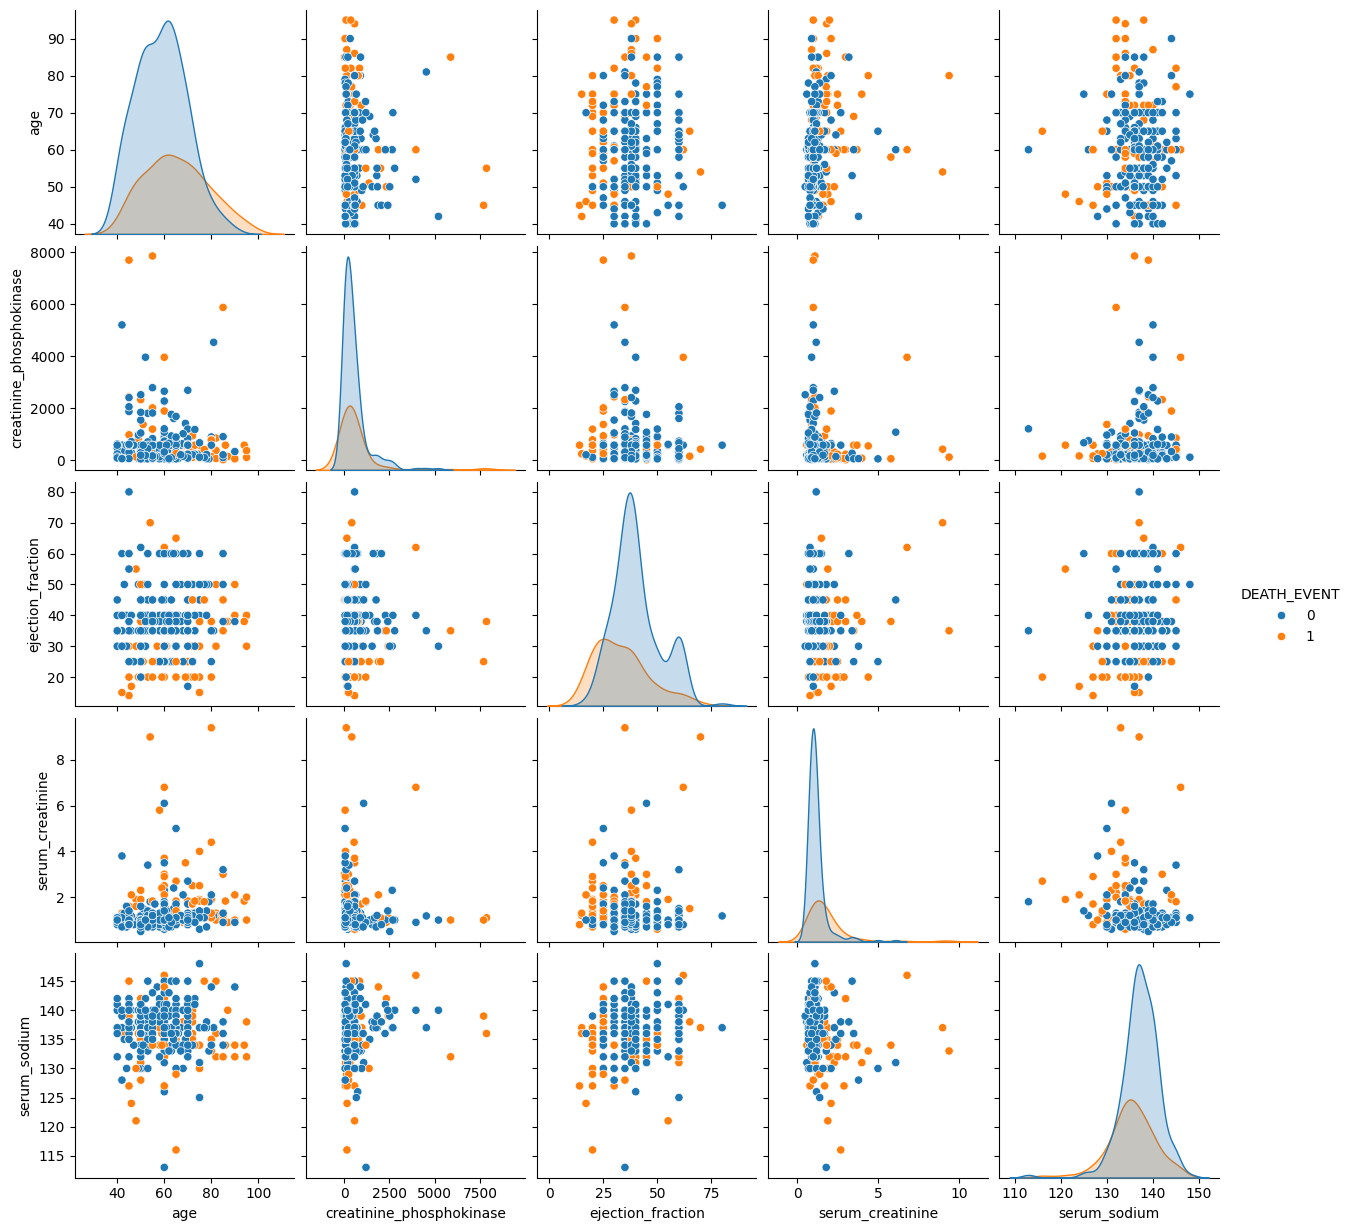

In [30]:
sns.pairplot(df, vars=continuous_vars, hue='DEATH_EVENT', diag_kind='kde')
plt.show()
sns.pairplot(df, vars=continuous_vars, hue='DEATH_EVENT', diag_kind='kde')
plt.show()

In [33]:
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [34]:
scaler = StandardScaler()
X_train[continuous_vars] = scaler.fit_transform(X_train[continuous_vars])
X_test[continuous_vars] = scaler.transform(X_test[continuous_vars])

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred_logreg = logreg.predict(X_test)
print('Logistic Regression Performance:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_logreg)}')
print(f'Precision: {precision_score(y_test, y_pred_logreg)}')
print(f'Recall: {recall_score(y_test, y_pred_logreg)}')
print(f'F1 Score: {f1_score(y_test, y_pred_logreg)}')

Logistic Regression Performance:
Accuracy: 0.8
Precision: 0.7391304347826086
Recall: 0.5862068965517241
F1 Score: 0.6538461538461539


In [37]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred_knn = knn.predict(X_test)
print('KNN Performance:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print(f'Precision: {precision_score(y_test, y_pred_knn)}')
print(f'Recall: {recall_score(y_test, y_pred_knn)}')
print(f'F1 Score: {f1_score(y_test, y_pred_knn)}')

KNN Performance:
Accuracy: 0.6111111111111112
Precision: 0.3333333333333333
Recall: 0.20689655172413793
F1 Score: 0.2553191489361702


In [39]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('Decision Tree Performance:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_tree)}')
print(f'Precision: {precision_score(y_test, y_pred_tree)}')
print(f'Recall: {recall_score(y_test, y_pred_tree)}')
print(f'F1 Score: {f1_score(y_test, y_pred_tree)}')

Decision Tree Performance:
Accuracy: 0.7888888888888889
Precision: 0.6923076923076923
Recall: 0.6206896551724138
F1 Score: 0.6545454545454545


In [40]:
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
print(f'Logistic Regression Cross-Validation Accuracy: {np.mean(cv_scores)}')
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_stratified = cross_val_score(logreg, X_train, y_train, cv=skf, scoring='accuracy')
print(f'Logistic Regression Stratified K-Fold Accuracy: {np.mean(cv_scores_stratified)}')

Logistic Regression Cross-Validation Accuracy: 0.8183507549361208
Logistic Regression Stratified K-Fold Accuracy: 0.813588850174216


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [41]:
param_grid_knn = {'n_neighbors': range(1, 20), 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
print(f'Best KNN Params: {grid_search_knn.best_params_}')
print(f'Best KNN CV Score: {grid_search_knn.best_score_}')


Best KNN Params: {'n_neighbors': 12, 'weights': 'uniform'}
Best KNN CV Score: 0.665156794425087


In [42]:
param_grid_tree = {'max_depth': range(1, 20), 'criterion': ['gini', 'entropy']}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5)
grid_search_tree.fit(X_train, y_train)
print(f'Best Decision Tree Params: {grid_search_tree.best_params_}')
print(f'Best Decision Tree CV Score: {grid_search_tree.best_score_}')

Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 1}
Best Decision Tree CV Score: 0.8470383275261325


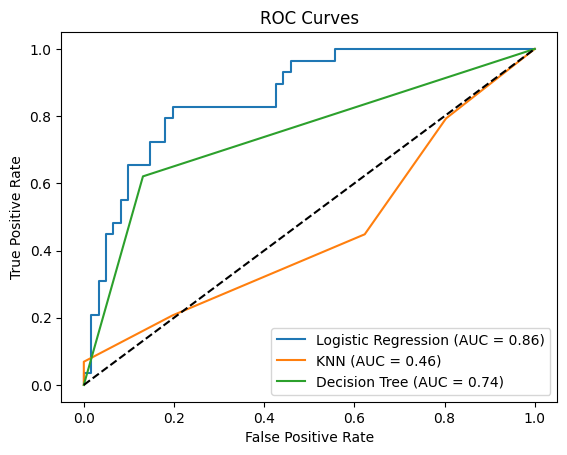

In [43]:
models = [logreg, knn, tree]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree']
for model, name in zip(models, model_names):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()